#### **Importing libraries**

In [44]:
import os
import re
import string
import random
from pathlib import Path

import numpy as np
import pandas as pd
from tqdm import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [45]:
# Make tqdm work well in notebooks
tqdm.pandas()

In [46]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\boosi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boosi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\boosi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\boosi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

##### **Dataset Loading**

In [47]:
fake_df = pd.read_csv("../data/raw/Fake.csv")
true_df = pd.read_csv("../data/raw/True.csv")

In [ ]:
#Showing Top elements
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [53]:
true_df.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


**Shape of Datasets**

In [49]:
print('Fake.csv shape:', fake_df.shape)
print('True.csv shape:', true_df.shape)

Fake.csv shape: (23481, 4)
True.csv shape: (21417, 4)


**Columns Names of Datasets**

In [50]:
print('\nFake columns:', fake_df.columns.tolist())
print('True columns:', true_df.columns.tolist())


Fake columns: ['title', 'text', 'subject', 'date']
True columns: ['title', 'text', 'subject', 'date']


**Adding labels**

In [54]:
# Label: 0 = Fake, 1 = Real (True)
fake_df['label'] = 0
true_df['label'] = 1

In [55]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [56]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


**Removing unneccessary columns and modifing the title and text**

In [ ]:
# Keep only title and text
use_cols = []
for c in ['title', 'text']:
    if c in fake_df.columns and c in true_df.columns:
        use_cols.append(c)

use_cols.append('label')

fake_df = fake_df[use_cols].copy()
true_df = true_df[use_cols].copy()

In [65]:
fake_df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [66]:
true_df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


**Combine the 2 csv files**

In [ ]:
# Combine files
combined = pd.concat([fake_df, true_df], ignore_index=True)
print('\nCombined shape:', combined.shape)


Combined shape: (44898, 3)


In [70]:
# Shuffle rows
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)

In [71]:
combined.head()

,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


### **Data Cleaning**

In [73]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [74]:
# can extend this list with stopwords
EXTRA_STOPWORDS = set(['said','will','one','two','also'])
stop_words = stop_words.union(EXTRA_STOPWORDS)

In [75]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
html_pattern = re.compile(r'<.*?>')

In [ ]:
def clean_text(text, keep_title=True):

    # Combine title and text if title exists
    # cases where the input may be a list/tuple
    if isinstance(text, (list, tuple)):
        text = ' '.join([t for t in text if isinstance(t, str)])

    #if text is not string it returns empty
    if not isinstance(text, str):
        return ''


    # 1. Remove URLs
    text = url_pattern.sub('', text) #replaces with empty string


    # 2. Remove HTML
    text = html_pattern.sub('', text)


    # 3. Coverts to Lowercase
    text = text.lower()


    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))


    # 5. Remove digits
    text = re.sub(r"\d+", ' ', text)


    # 6. Collapse whitespace
    text = re.sub(r'\s+', ' ', text).strip()


    return text

In [77]:
#tokenization and lemmatization
def tokenize_and_lemmatize(text):
    # Simple tokenization using split 
    tokens = text.split()
    # Remove stopwords and short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

In [78]:
# Apply cleaning step-by-step 
# Create a combined_text column that concatenates title + text (if title exists)
if 'title' in combined.columns:
    combined['combined_text'] = combined[['title','text']].astype(str).agg(' '.join, axis=1)
else:
    combined['combined_text'] = combined['text'].astype(str)


# 1) Basic cleaning (urls, html, punctuation, digits)
combined['clean_1_basic'] = combined['combined_text'].progress_apply(clean_text)


# 2) Tokenize + remove stopwords + lemmatize
combined['cleaned_text'] = combined['clean_1_basic'].progress_apply(tokenize_and_lemmatize)



100%|██████████| 44898/44898 [00:56<00:00, 797.15it/s] 


In [80]:
# drop intermediary columns to keep only what's needed
final_df = combined[['cleaned_text','label']].copy()
final_df = final_df.rename(columns={'cleaned_text':'text'})

In [81]:
final_df.head()

,text,label
0,ben stein call circuit court committed ‘coup d...,0
1,trump drop steve bannon national security coun...,1
2,puerto rico expects lift jones act shipping re...,1
3,oops trump accidentally confirmed leaked israe...,0
4,donald trump head scotland reopen golf resort ...,1


In [82]:
final_df.shape

(44898, 2)

**Handle missing and duplicates**

In [83]:
# Drop empty strings
final_df['text'] = final_df['text'].astype(str)
final_df = final_df[final_df['text'].str.strip() != '']

In [85]:
# Drop duplicates
before = final_df.shape[0]
final_df = final_df.drop_duplicates(subset=['text']).reset_index(drop=True)
after = final_df.shape[0]

In [87]:
print(f'Rows before dropping duplicates: {before}, after: {after}')

Rows before dropping duplicates: 44889, after: 39092


#### **EDA**

In [89]:
print('\nDataset size after cleaning:', final_df.shape)
print('\nLabel distribution:')
print(final_df['label'].value_counts())


Dataset size after cleaning: (39092, 2)

Label distribution:
label
1    21192
0    17900
Name: count, dtype: int64


#### **Visualization**

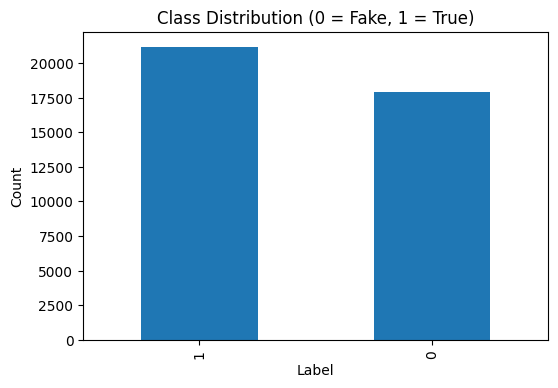

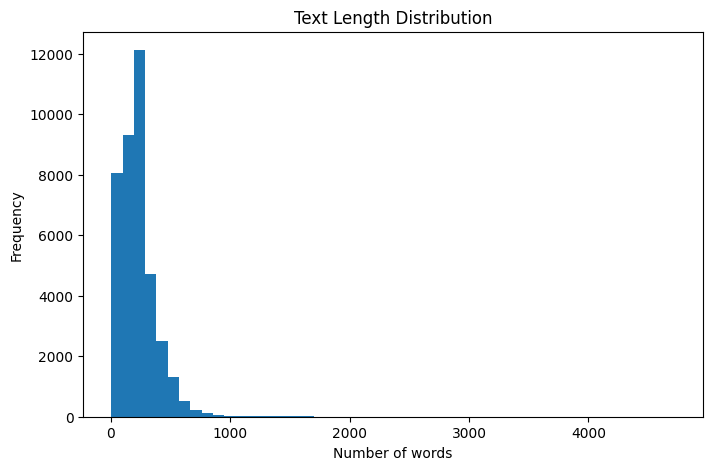

In [ ]:
# Plotting all the graphs
import matplotlib.pyplot as plt


# 1) Class Distribution
final_df['label'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Class Distribution (0 = Fake, 1 = True)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


# 2) Text Length Distribution
final_df['text_length'] = final_df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
plt.hist(final_df['text_length'], bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()


Top 20 Words Overall:
 [('trump', 117135), ('state', 51270), ('would', 49609), ('president', 46325), ('republican', 37418), ('people', 35670), ('year', 29846), ('reuters', 28283), ('new', 28269), ('house', 26456), ('donald', 25886), ('say', 25421), ('government', 25358), ('time', 22656), ('clinton', 22206), ('could', 21570), ('obama', 21459), ('election', 21441), ('united', 21314), ('country', 21080)]


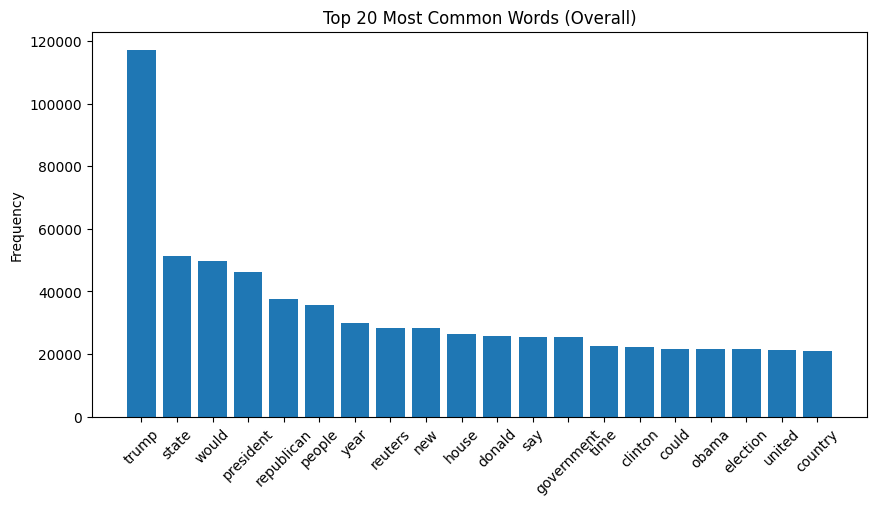

Top 20 Fake News Words:
 [('trump', 70132), ('people', 21099), ('president', 20390), ('would', 18339), ('state', 16296), ('donald', 15619), ('republican', 14840), ('like', 14769), ('obama', 13914), ('clinton', 13795), ('time', 13772), ('image', 13656), ('video', 12991), ('say', 12547), ('american', 12162), ('year', 11350), ('even', 11237), ('new', 10866), ('white', 10842), ('hillary', 10745)]


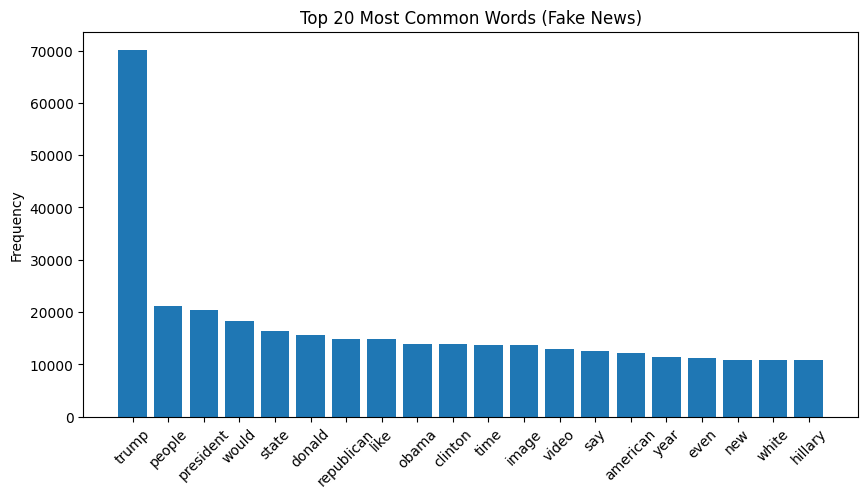

Top 20 True News Words:
 [('trump', 47003), ('state', 34974), ('would', 31270), ('reuters', 28042), ('president', 25935), ('republican', 22578), ('government', 19107), ('year', 18496), ('house', 17948), ('new', 17403), ('united', 15390), ('official', 14835), ('people', 14571), ('election', 14169), ('told', 14100), ('party', 13965), ('could', 13696), ('country', 12941), ('say', 12874), ('last', 12524)]


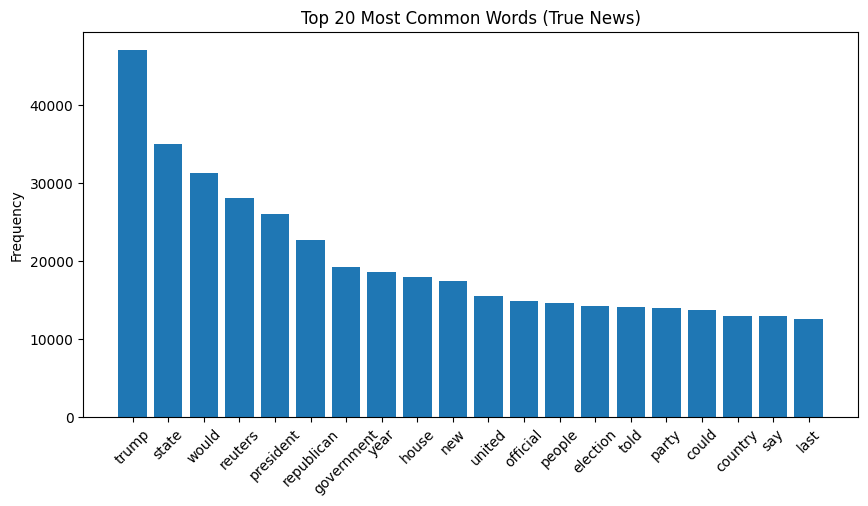

In [ ]:
# 3) Top Words 
from collections import Counter


# Function to get top n words
def get_top_words(text_series, n=20):
    words = " ".join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)


# Top words overall
top_overall = get_top_words(final_df['text'], 20)
print("Top 20 Words Overall:\n", top_overall)


# Plot Top Overall Words
words, counts = zip(*top_overall)
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words (Overall)")
plt.ylabel("Frequency")
plt.show()


# Top words in Fake News
fake_top = get_top_words(final_df[final_df['label']==0]['text'], 20)
print("Top 20 Fake News Words:\n", fake_top)


words, counts = zip(*fake_top)
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words (Fake News)")
plt.ylabel("Frequency")
plt.show()


# Top words in True News
true_top = get_top_words(final_df[final_df['label']==1]['text'], 20)
print("Top 20 True News Words:\n", true_top)


words, counts = zip(*true_top)
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words (True News)")
plt.ylabel("Frequency")
plt.show()

**Save cleaned CSV**

In [96]:
final_df.to_csv('../data/processed/cleaned_data.csv', index=False)
print("Saved cleaned data to processed folder")


Saved cleaned data to processed folder
